In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/EVA4/S11

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/EVA4/S11


In [2]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-gsfy0kg2
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-gsfy0kg2
     |████████████████████████████████| 634kB 4.9MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=e1e8a0e0baf13d1f6e8f503e5274b3e116987e7bd16822d521c8f5e654a9eff6
  Stored in directory: /tmp/pip-ephem-wheel-cache-t8pwgpdp/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=6dea1f6041784bbb4f47ab56e36d459670c510d99ec465aa82617084f53a6558
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [0]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import math
from torch import nn
from torch.nn import functional as F
import torchvision
import os

In [0]:
from utils.download_load import download_load
from utils.display_imgs import display_imgs
from utils.tt import train,test
from utils.disp_summary import disp_summary
from utils.lr_finder import LRFinder
#from utils.triangle_lr  import *
#from model.ResNet18 import ResNet18
from model.MyResNet import MyResNet
from utils.CyclicLR import CyclicLR

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary
import torch

In [5]:
trainset, testset, train_loader, test_loader, classes = download_load()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

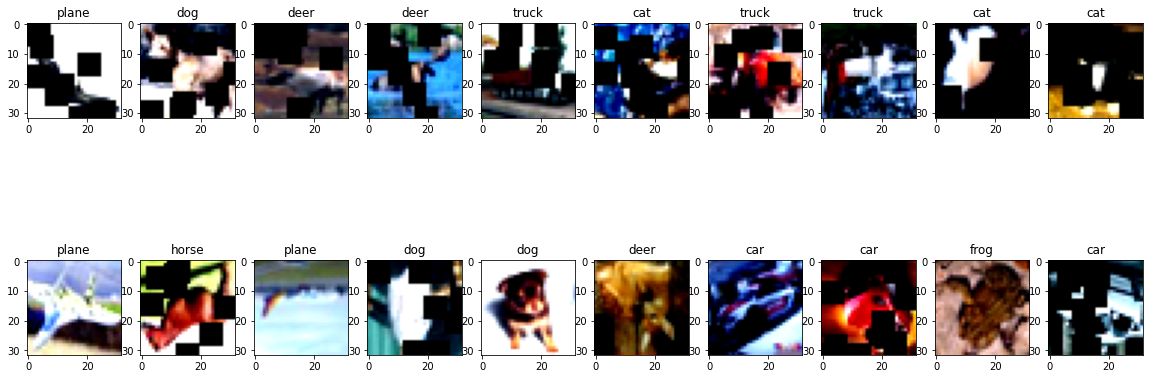

In [6]:
from utils.display_imgs import display_imgs
display_imgs(train_loader, classes)

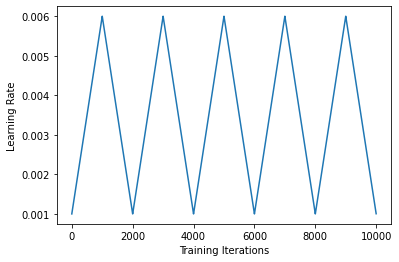

In [7]:
CyclicLR(num_itr=10000,base_lr=0.001, max_lr=0.006,step_size=1000)

In [8]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = MyResNet().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1,momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr=0.03,  total_steps=24,pct_start=0.2083, final_div_factor=1, div_factor=10)
#scheduler = OneCycleLR(optimizer, max_lr = 0.03, total_steps=None, epochs=24, steps_per_epoch=1, pct_start=0.3,cycle_momentum=False, base_momentum=0.85, max_momentum=0.95, div_factor=10)

In [34]:
epoch_train_accuracy = []
epoch_test_accuracy = []
epoch_train_loss = []
epoch_test_loss = []
EPOCHS = 24
LR_list = []

for epoch in range(EPOCHS):
      print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
      LR_list.append(optimizer.param_groups[0]['lr'])
      epoch_train_loss,epoch_train_accuracy = train(model, device, train_loader, optimizer, criterion, epoch)
      scheduler.step()
      epoch_test_loss , epoch_test_accuracy = test(model, device,test_loader,criterion)
      #scheduler.step()

EPOCH: 1 LR: 0.002999999999999999
Epoch Train loss: 0.06266355105512536
Epoch Train Accuracy: 97.87
Epoch Test loss: 0.3976546123623848
Epoch Test Accuracy: 89.77
EPOCH: 2 LR: 0.006955558344737111
Epoch Train loss: 0.07132412938727546
Epoch Train Accuracy: 97.58
Epoch Test loss: 0.41432162225246427
Epoch Test Accuracy: 89.5
EPOCH: 3 LR: 0.016504241998412234
Epoch Train loss: 0.08688340793104515
Epoch Train Accuracy: 96.954
Epoch Test loss: 0.44634163826704026
Epoch Test Accuracy: 88.87
EPOCH: 4 LR: 0.02605043980435138
Epoch Train loss: 0.10232266672339636
Epoch Train Accuracy: 96.472
Epoch Test loss: 0.5172216936945915
Epoch Test Accuracy: 87.98
EPOCH: 5 LR: 0.029999999881902766
Epoch Train loss: 0.11034152434044278
Epoch Train Accuracy: 96.218
Epoch Test loss: 0.5289174169301987
Epoch Test Accuracy: 87.53
EPOCH: 6 LR: 0.02981559904845503
Epoch Train loss: 0.11691860547385265
Epoch Train Accuracy: 95.888
Epoch Test loss: 0.4960819214582443
Epoch Test Accuracy: 87.63
EPOCH: 7 LR: 0.0292

In [29]:
print("Max Learning Rate",max(LR_list))
print("Min Learning Rate",min(LR_list))

Max Learning Rate 0.029999999881902766
Min Learning Rate 0.002999999999999999


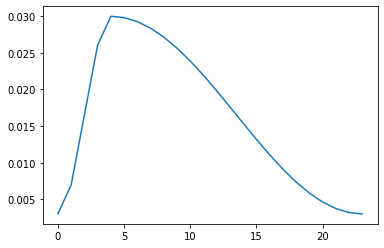

In [30]:
plt.plot(LR_list)